In [1]:
from indigo import Indigo
import pandas as pd
from ord_data_load import ORD_PATH, draw_reaction_rand
from IPython.display import SVG

In [2]:
indigo = Indigo()

In [3]:
indigo.version()

'1.9.0.0-gca3f2ab4a-x86_64-win-msvc-1934'

In [4]:
pd_df = pd.read_pickle(f'{ORD_PATH}/pd_df.pkl')
BUCHWALD_RXN_SMARTS = "[c:1]-[Br,Cl,I].[NX3:2]>>[c:1]-[NX3:2]"

In [5]:
pd_df.reset_index(inplace=True, drop=True)

Reaction: 3000
Solvent: [['N,N-dimethyl formamide', 'CN(C=O)C']]
Catalyst [['bis(triphenylphosphine)palladium (II) chloride', 'C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.Cl[Pd]Cl'], ['copper (I) iodide', '[Cu]I']]


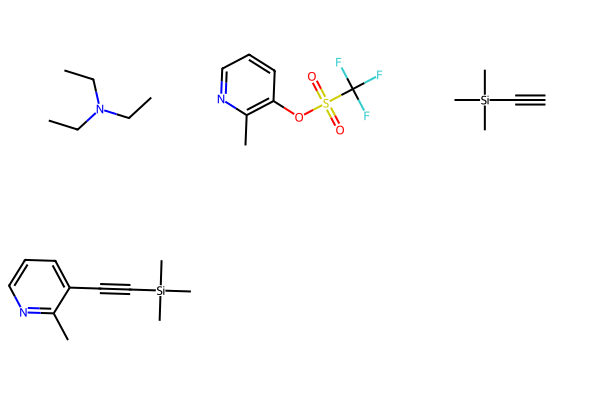

First, 2-methylpyridin-3-yl trifluoromethanesulfonate (34.3 g, 142 mmol), trimethylsilylacetylene (30 ml, 212 mmol), bis(triphenylphosphine)palladium (II) chloride (10.0 g, 14.2 mmol), and copper (I) iodide (2.75 g, 14.4 mmol) were dissolved in N,N-dimethyl formamide (150 ml). Thereafter, triethylamine (43 ml, 309 mmol) was added in a nitrogen atmosphere at room temperature to the mixture. The mixture was then stirred for 3 hours (exothermic reaction took place). The reaction mixture was separated by ethyl acetate and a saturated aqueous ammonium chloride solution and insoluble substance was removed by filtration. The organic layer of the filtrate was washed twice with a saturated aqueous ammonium chloride solution, dried over anhydrous magnesium sulfate, filtrated and concentrated to obtain the title compound (22.6 g, yield: 84.1%) as brown oil.


In [6]:
draw_reaction_rand(pd_df, rxn_index=3000)
rxn_smile = pd_df.loc[3000, 'reaction_smile']

In [7]:
rxn = indigo.loadReaction(rxn_smile)
rxn

In [12]:
from indigo.renderer import IndigoRenderer

renderer = IndigoRenderer(indigo)

indigo.setOption("render-output-format", "svg")
# indigo.setOption("render-superatom-mode", "collapse")
indigo.setOption("render-coloring", True)
# indigo.setOption("render-base-color", "1, 1, 1")
indigo.setOption("render-relative-thickness", 1.5)


CPU times: total: 46.9 ms
Wall time: 44.2 ms


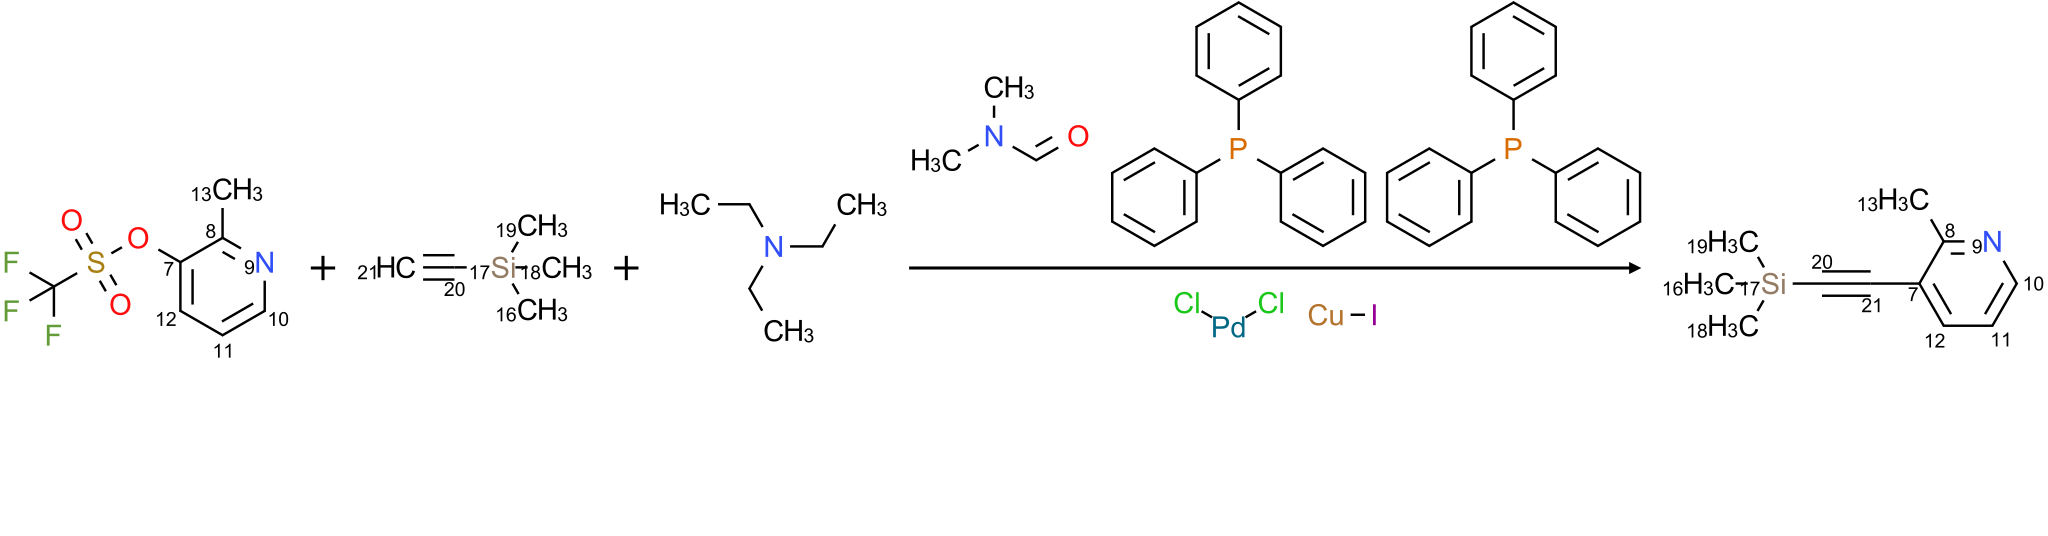

In [13]:
%%time

SVG(renderer.renderToBuffer(rxn))

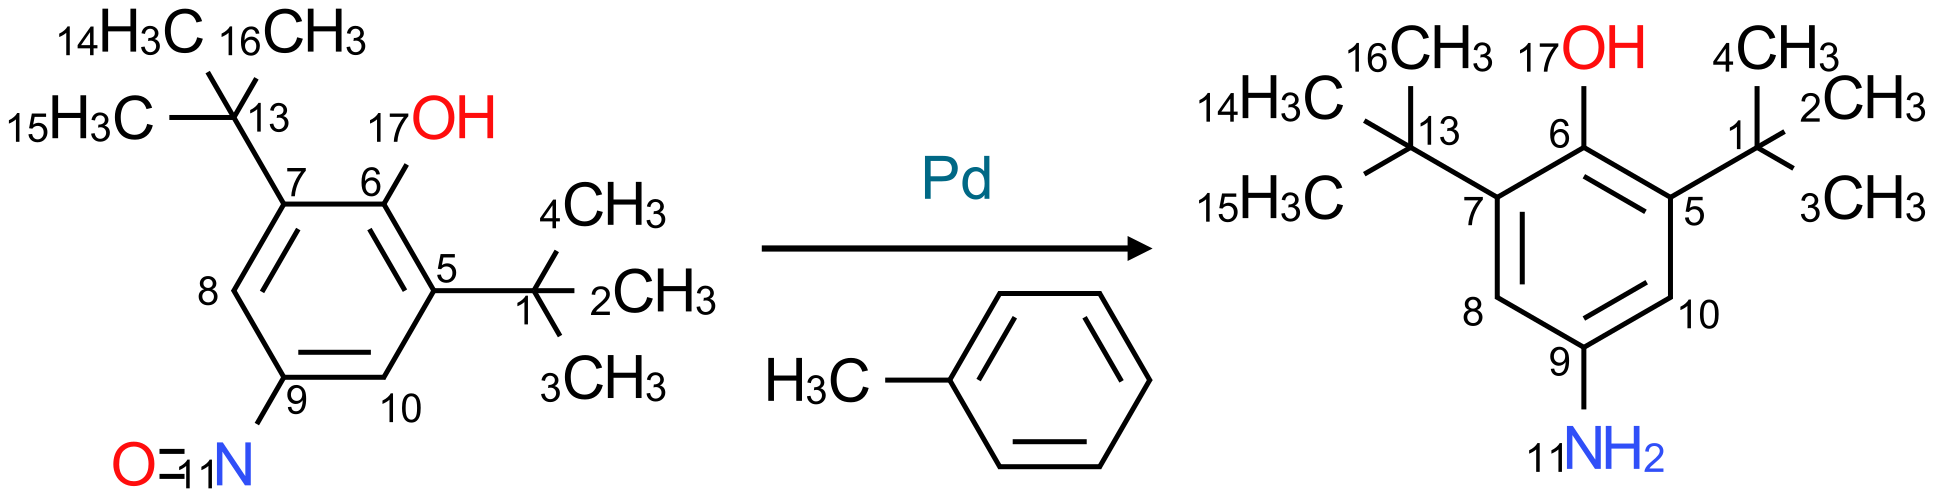

In [19]:
import numpy as np
SVG(renderer.renderToBuffer(indigo.loadReaction(pd_df.loc[np.random.randint(0, len(pd_df)), 'reaction_smile'])))